##Data Cleaning & Preparation

### Data Loading and Initial Inspection
The dataset is first loaded and inspected to understand its structure, size, and data quality. This step helps identify missing values, data types, and potential cleaning requirements before analysis.


In [4]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load dataset
df = pd.read_csv("AviationData.csv", encoding="latin1")

# Basic structure
df.shape
# Preview data
df.head()
# Data types and non-null counts
df.info()
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Accident Severity Classification
To simplify severity analysis, a binary feature is created to distinguish between fatal and non-fatal accidents. This allows for clearer comparisons across aircraft categories and operating conditions.


In [8]:
df['Fatal_Accident'] = df['Total.Fatal.Injuries'].fillna(0).apply(lambda x: 1 if x > 0 else 0)
df[['Total.Fatal.Injuries', 'Fatal_Accident']].head(10)



,Total.Fatal.Injuries,Fatal_Accident
0,2.0,1
1,4.0,1
2,3.0,1
3,2.0,1
4,1.0,1
5,NaN,0
6,4.0,1
7,0.0,0
8,0.0,0
9,0.0,0


### Standardizing Phase of Flight
The `Broad.phase.of.flight` column contains inconsistent labels and missing values. Values are standardized and missing entries are labeled as 'Unknown' to retain as much data as possible.


In [9]:
df['Broad.phase.of.flight'] = (
    df['Broad.phase.of.flight']
    .fillna('Unknown')
    .str.title()
    .str.strip()
)
df['Broad.phase.of.flight'].head(10)


,Broad.phase.of.flight
0,Cruise
1,Unknown
2,Cruise
3,Cruise
4,Approach
5,Climb
6,Unknown
7,Takeoff
8,Landing
9,Cruise


### Weather Conditions
Weather condition values are standardized and missing values are categorized as 'Unknown' to support comparative analysis.


In [10]:
df['Weather.Condition'] = (
    df['Weather.Condition']
    .fillna('Unknown')
    .str.upper()
    .str.strip()
)
df['Weather.Condition'].head(10)


,Weather.Condition
0,UNK
1,UNK
2,IMC
3,IMC
4,VMC
5,VMC
6,IMC
7,VMC
8,IMC
9,IMC


##Check for duplicates

In [12]:
df.duplicated().sum()


np.int64(0)

### Feature Selection
A subset of relevant variables is selected to support analysis and visualization while maintaining clarity and performance.


In [13]:
analysis_df = df[[
    'Event.Date',
    'Country',
    'Aircraft.Category',
    'Make',
    'Model',
    'Purpose.of.flight',
    'Broad.phase.of.flight',
    'Weather.Condition',
    'Injury.Severity',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Fatal_Accident'
]]
analysis_df.head()



,Event.Date,Country,Aircraft.Category,Make,Model,Purpose.of.flight,Broad.phase.of.flight,Weather.Condition,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Fatal_Accident
0,1948-10-24,United States,NaN,Stinson,108-3,Personal,Cruise,UNK,Fatal(2),2.0,0.0,0.0,0.0,1
1,1962-07-19,United States,NaN,Piper,PA24-180,Personal,Unknown,UNK,Fatal(4),4.0,0.0,0.0,0.0,1
2,1974-08-30,United States,NaN,Cessna,172M,Personal,Cruise,IMC,Fatal(3),3.0,NaN,NaN,NaN,1
3,1977-06-19,United States,NaN,Rockwell,112,Personal,Cruise,IMC,Fatal(2),2.0,0.0,0.0,0.0,1
4,1979-08-02,United States,NaN,Cessna,501,Personal,Approach,VMC,Fatal(1),1.0,2.0,NaN,0.0,1


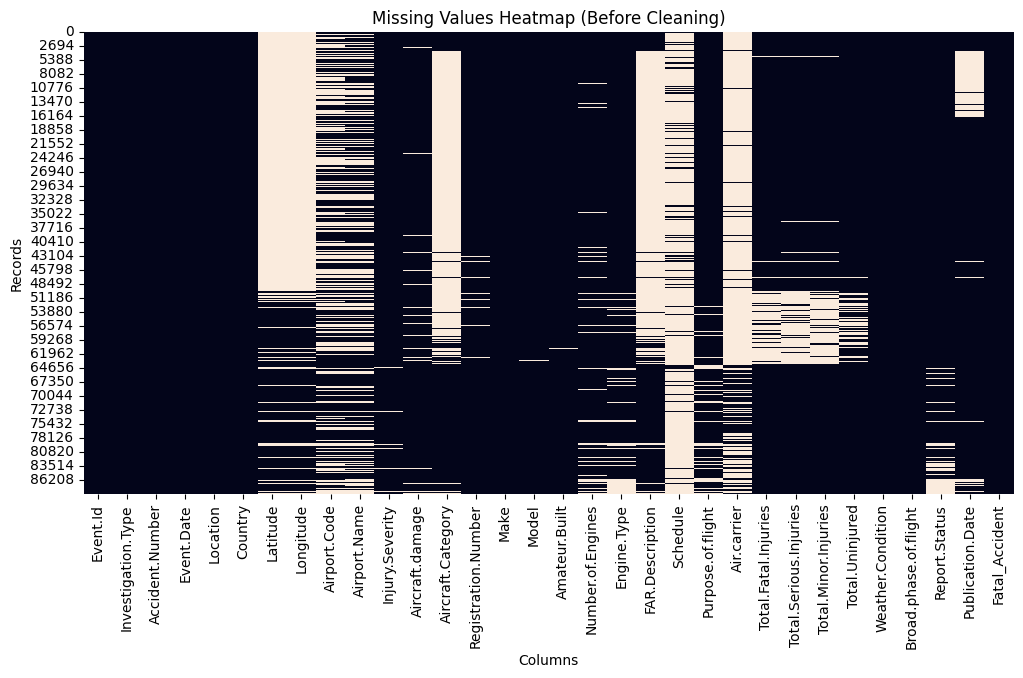

In [14]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap (Before Cleaning)")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.show()


### Missing Value Treatment Strategy

Rather than dropping records with missing values, imputation is used to preserve the full dataset. Numerical injury-related columns are filled using the mean, while categorical variables are filled with 'Unknown'. This approach maintains dataset size while minimizing distortion of overall trends.


In [15]:
numerical_cols = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines'
]

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())


In [16]:
categorical_cols = [
    'Broad.phase.of.flight',
    'Weather.Condition',
    'Aircraft.Category',
    'Purpose.of.flight',
    'Longitude',
    'Latitude',
    'Airport.Code',
    'Injury.Severity',
    'Aircraft.damage',
    'Aircraft.Category',
    'Make',
    'Model',
    'Amateur.Built',
    'Engine.Type',
    'FAR.Description',
    'Schedule',
    'Purpose.of.flight',
    'Air.carrier',
    'Report.Status',
    'Publication.Date',
    'Airport.Name',
    'Registration.Number'


]

for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')


After imputing missing values, a second heatmap is generated to confirm that missing data has been successfully addressed.


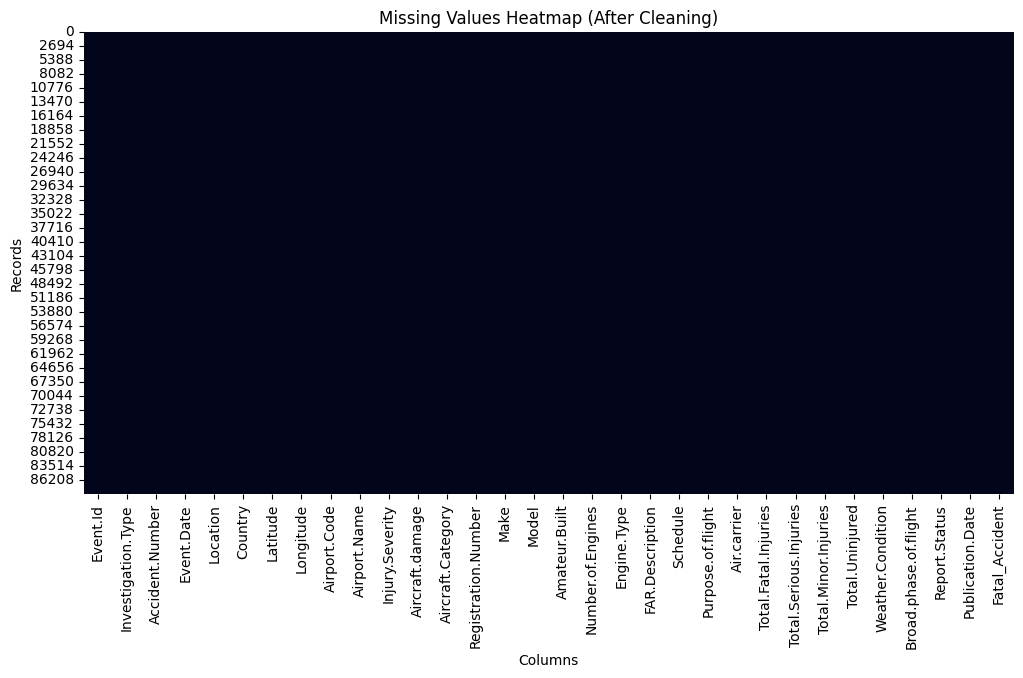

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap (After Cleaning)")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.show()


## Outlier Detection and Treatment Using IQR

After addressing missing values, the interquartile range (IQR) method is used to identify and treat extreme outliers in numerical injury-related variables. Outliers are capped to reduce their influence while preserving all records.


In [18]:
numerical_cols = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


##Exploratory Data Analysis

### Accident Trends Over Time
Understanding how aviation accidents have changed over time provides important context for risk assessment. This analysis examines overall accident frequency by year to identify long-term trends.


In [16]:
# Extract year from event date
analysis_df['Year'] = analysis_df['Event.Date'].dt.year

# Count accidents per year
accidents_per_year = analysis_df.groupby('Year').size()

accidents_per_year.head()


,0
Year,
1948,1
1962,1
1974,1
1977,1
1979,2


<Axes: title={'center': 'Number of Aviation Accidents by Year'}, xlabel='Year', ylabel='Number of Accidents'>

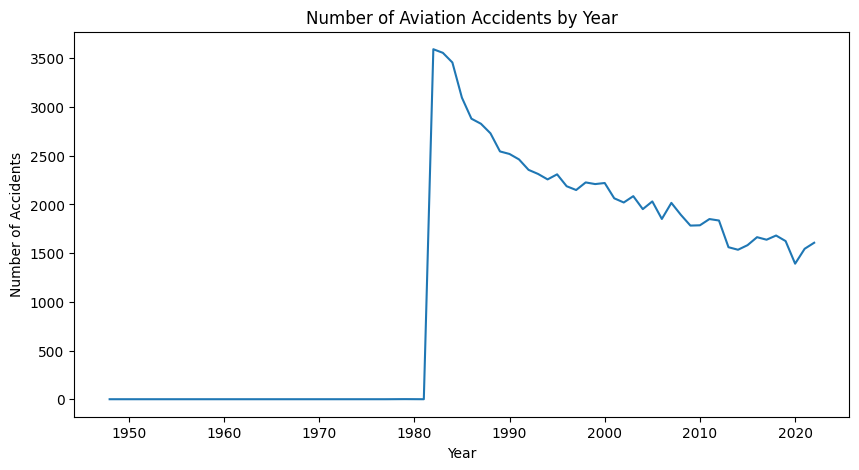

In [22]:
# Plot accident trends
accidents_per_year.plot(
    title="Number of Aviation Accidents by Year",
    xlabel="Year",
    ylabel="Number of Accidents",
    figsize=(10, 5)
)


The chart shows how aviation accidents have changed over the years. Even though the number of reports differs each year, it gives a clear picture of long-term safety trends.


### Accidents by Phase of Flight
Certain stages of flight are riskier than others. This analysis identifies which phases of flight are associated with the highest number of accidents.


In [23]:
phase_counts = (
    analysis_df['Broad.phase.of.flight']
    .value_counts()
    .sort_values(ascending=False)
)

phase_counts


,count
Broad.phase.of.flight,
Unknown,27713
Landing,15428
Takeoff,12493
Cruise,10269
Maneuvering,8144
Approach,6546
Climb,2034
Taxi,1958
Descent,1887


<Axes: title={'center': 'Aviation Accidents by Phase of Flight'}, xlabel='Phase of Flight', ylabel='Number of Accidents'>

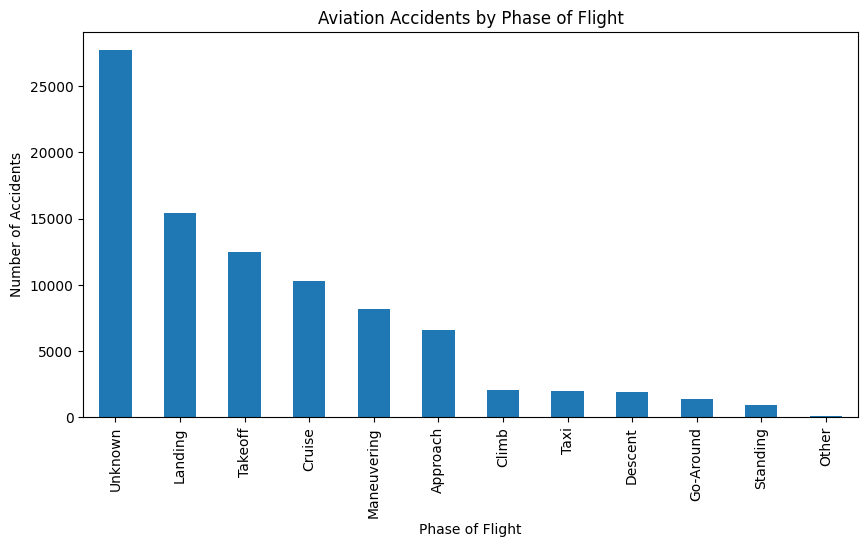

In [24]:
phase_counts.plot(
    kind='bar',
    title="Aviation Accidents by Phase of Flight",
    xlabel="Phase of Flight",
    ylabel="Number of Accidents",
    figsize=(10, 5)
)


The chart shows that most accidents happen during takeoff and landing. These parts of the flight are the most risky, so safety efforts should focus on them.


### Fatal vs Non-Fatal Accidents
To assess accident severity, accidents are classified as fatal or non-fatal based on reported fatal injuries. This distinction helps quantify the proportion of high-severity incidents.


In [25]:
fatal_counts = analysis_df['Fatal_Accident'].value_counts()

fatal_counts


,count
Fatal_Accident,
0,71076
1,17813


<Axes: title={'center': 'Fatal vs Non-Fatal Aviation Accidents'}, xlabel='Accident Type', ylabel='Number of Accidents'>

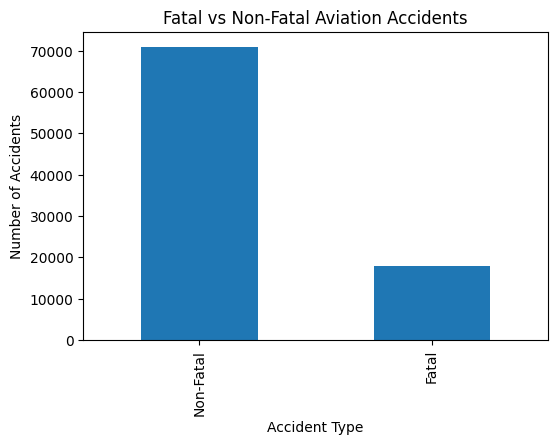

In [26]:
fatal_counts.rename(
    index={0: 'Non-Fatal', 1: 'Fatal'}
).plot(
    kind='bar',
    title="Fatal vs Non-Fatal Aviation Accidents",
    xlabel="Accident Type",
    ylabel="Number of Accidents",
    figsize=(6, 4)
)


Most aviation accidents don’t cause deaths, but some do. This shows why it’s important to understand which conditions or aircraft are linked to more serious accidents.

### Aircraft Category Risk Comparison
This analysis compares accident frequency across aircraft categories to identify patterns that may inform lower-risk acquisition decisions.


In [27]:
aircraft_category_counts = (
    analysis_df['Aircraft.Category']
    .value_counts()
    .sort_values(ascending=False)
)

aircraft_category_counts


,count
Aircraft.Category,
Airplane,27617
Helicopter,3440
Glider,508
Balloon,231
Gyrocraft,173
Weight-Shift,161
Powered Parachute,91
Ultralight,30
Unknown,14


<Axes: title={'center': 'Accidents by Aircraft Category'}, xlabel='Aircraft Category', ylabel='Number of Accidents'>

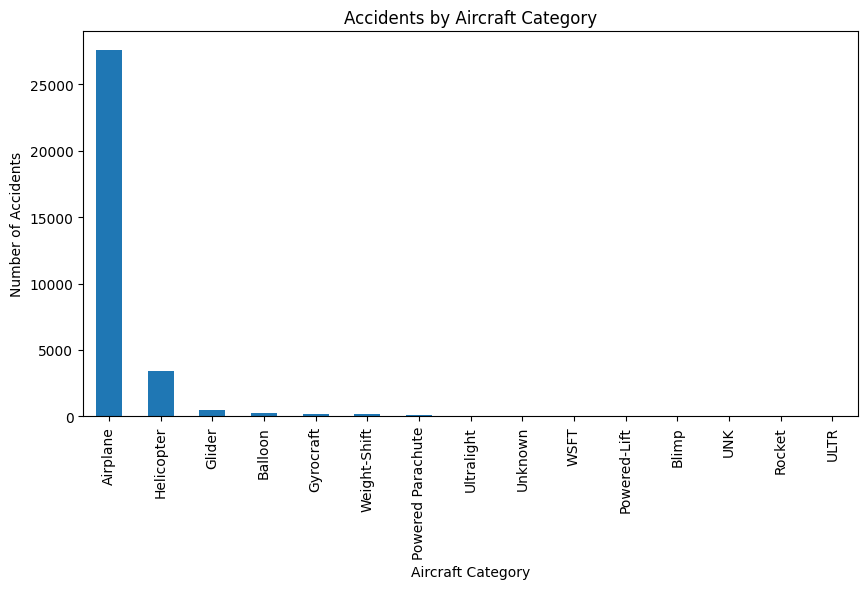

In [28]:
aircraft_category_counts.plot(
    kind='bar',
    title="Accidents by Aircraft Category",
    xlabel="Aircraft Category",
    ylabel="Number of Accidents",
    figsize=(10, 5)
)


The chart shows that some types of aircraft have more accidents than others. Aircraft with fewer accidents may be lower risk, but how often they are used should also be taken into account.

### Weather Conditions and Accident Severity
Weather conditions can significantly impact flight safety. This analysis explores how accident frequency varies across different reported weather conditions.


In [29]:
weather_counts = (
    analysis_df['Weather.Condition']
    .value_counts()
    .sort_values(ascending=False)
)

weather_counts


,count
Weather.Condition,
VMC,77303
IMC,5976
UNKNOWN,4492
UNK,1118


<Axes: title={'center': 'Accidents by Weather Condition'}, xlabel='Weather Condition', ylabel='Number of Accidents'>

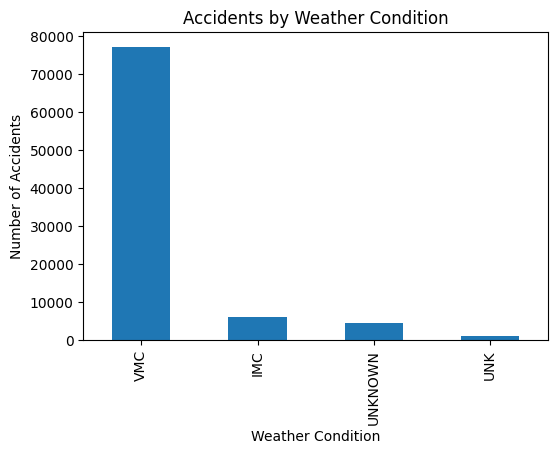

In [30]:
weather_counts.plot(
    kind='bar',
    title="Accidents by Weather Condition",
    xlabel="Weather Condition",
    ylabel="Number of Accidents",
    figsize=(6, 4)
)


Most accidents happen in good weather because more flights take place then. However, accidents in bad weather are more likely to be serious.

Key Findings

The analysis of past aviation accident data shows several clear patterns that are useful for managing risk and choosing aircraft:

1.Accidents happen more often during takeoff and landing, making these the riskiest parts of a flight.

2.Accident numbers change over time, influenced by how often flights occur, how accidents are reported, and improvements in safety rules. Looking at many years helps show overall safety trends.

3.Most accidents do not involve deaths, meaning serious accidents are less common than minor ones.

4.Some aircraft types have fewer accidents than others, which may suggest lower risk, but this should be considered alongside how often each aircraft is used.

5.Weather affects both accident frequency and severity, and although fewer flights happen in bad weather, accidents that occur then tend to be more serious.

Recommendations

Based on the analysis, here are some simple and practical recommendations to support safer aircraft decisions:

Choose aircraft types with fewer past accidents when possible, while also considering how and where the aircraft will be used.

Focus safety efforts on takeoff and landing, since these are the most risky parts of a flight. This can include better training and stricter procedures.

Plan carefully for bad weather conditions, especially when flying without clear visibility, as these situations carry higher risk.

Use past accident data to understand risks, but keep in mind that safety technology and rules have improved over time.

Use interactive dashboards to track accident trends, helping teams make informed decisions as new data becomes available.